In [2]:
from tweepy import OAuthHandler
import twitter, json
import tweepy

In [11]:
consumer_key='K2BpgbXOOB8HDIXBBOGIKpEMi'
consumer_secret='TTIRfgqjN2ZM38yskWPtRRaO5iUvEUOTPho56M59OqmjkzzFZ7'
access_token_key='888285134817968129-BGmo5rRDlaP2iz9r8hgUwuETOoGQ7WD'
access_token_secret='CO5XjAT8GYknxdvWwgD8PeZVK9UNqzUB1YpE8K9rogJSr'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth)


In [40]:
#results = tweepy.Cursor(api.search,q='quote.plus', lang='en', count=100)
tweets = [status._json for status in tweepy.Cursor(api.search,q='nytimes.com', lang='en').items(100)]
#json_strings = [json.dumps(json_obj) for json_obj in tweets] 

In [45]:
quote = [twt["is_quote_status"] for twt in tweets]
text = [twt["text"] for twt in tweets]

print(tweets[1].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])


<h3>Streaming Tweets</h3>

Pivot: try streaming tweets and filtering as they come in.

In [48]:


from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import csv

website_list = ['nytimes.com','medium.com','seattletimes.com']

# Open/create a file to append data to
csvFile = open('result.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)

class StdOutListener(StreamListener):
    """ A listener handles tweets that are received from the stream.
    This is a basic listener that just prints received tweets to stdout.
    """
    
    def on_data(self, data):
        #print(data)
        return True

    def on_error(self, status):
        print('Error in listener')
        
    def on_status(self, status):
        if status.retweeted_status:
            return
        #if status.favorite_count is None or status.favorite_count < 10:
        #    return
        description = status.user.description
        loc = status.user.location
        text = status.text
        coords = status.coordinates
        name = status.user.screen_name
        user_created = status.user.created_at
        followers = status.user.followers_count
        id_str = status.id_str
        created = status.created_at
        retweets = status.retweet_count
        if coords is not None:
            coords = json.dumps(coords)
        csvWriter.writerow([text.encode('utf-8'),retweets,followers])
        

if __name__ == '__main__':
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token_key, access_token_secret)

    stream = Stream(auth, l)
    stream.filter(track=website_list)

KeyboardInterrupt: 

In [49]:
print(m)

NameError: name 'm' is not defined

In [61]:

# Open/create a file to append data to
csvFile = open('result2.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q='nytimes.com', lang='en').items(100):

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.created_at, tweet.retweet_count, tweet.text.encode('utf-8')])
    print(tweet.created_at, tweet.text)
csvFile.close()

2017-07-21 15:56:05 RT @tackettdc: NEWS Sean Spicer Resigns as White House Press Secretary @GLENNTHRUSH https://t.co/eUwRGpJ2jl
2017-07-21 15:56:04 RT @paulkrugman: As Congressional Rs attack CBO for being honest, a reminder that this was all obvious long ago https://t.co/yZ6NJIMERV
2017-07-21 15:56:04 #Earthquake in #Aegean Sea Kills 2 Tourists https://t.co/PMTevw2I1U #twitter https://t.co/TGHDdwfJ0Q
2017-07-21 15:56:04 RT @NormEisen: Mr. Pres, you really pissed me, @RWPUSA &amp; @tribelaw off w self pardon talk. no such thing! we r writing 2explain why https:/…
2017-07-21 15:56:04 RT @tackettdc: NEWS Sean Spicer Resigns as White House Press Secretary @GLENNTHRUSH https://t.co/eUwRGpJ2jl
2017-07-21 15:56:03 RT @siegelmd: A health bill everybody hates.17% approve.0 sponsors 0 hearings 0 champions 0 advocates @sgremminger @roseperson https://t.co…
2017-07-21 15:56:03 RT @SuB8u: The shape of sensors to come! A temporary lightweight, breathable sensor tattoo that can monitor vital signs. 

2017-07-21 15:55:22 Review: ‘Dunkirk’ Is a Tour de Force War #Movie, Both Sweeping and Intimate via @ManohlaDargis https://t.co/QoNVh0WepX
2017-07-21 15:55:21 RT @Max_Fisher: I don't know how to acknowledge the parallels with other countries here without sounding hyperbolic or alarmist. https://t.…
2017-07-21 15:55:21 "Another Possible Indignity of Age: Arrest" by PAULA SPAN via NYT https://t.co/lnfxQzqd9U #disabilityinthenews
2017-07-21 15:55:20 Researchers Use DNA to Store and Retrieve Digital Movie https://t.co/NUTKhrxRuu &amp; article in @NYTScience by G.Kolata https://t.co/fjlypQItGY
2017-07-21 15:55:20 When mere cataloguing can count as journalism  President Trump’s Lies, the Definitive List https://t.co/F9PVPOkwla
2017-07-21 15:55:20 RT @nytimes: A streaming channel led by 4 women has a mission: to be a safe place for underrepresented gamers https://t.co/Kcu5Jt975o
2017-07-21 15:55:20 "UAW Talking to GM About Impact of Car Sales Slump on U.S. Jobs" by REUTERS via NYT https://t.c

In [72]:
import pandas as pd

df = pd.read_csv('result2.csv')
df.head()
data=df.ix[:,1]

/Users/kimberly/anaconda3/envs/insight_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


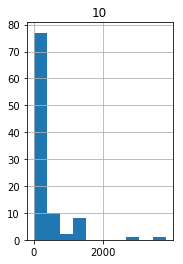

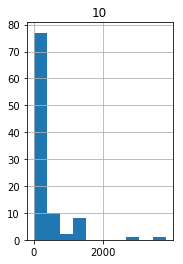

In [75]:
import matplotlib.pyplot as plt
import numpy as np

#import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api


plt.hist(data)
plt.title("Retweet Histogram")
#plt.xlabel("Value")
#plt.ylabel("Frequency")

fig = plt.gcf()
plt.show()